In [1]:
import numpy as np 
import pandas as pd
import sklearn.metrics as metrics

In [3]:
df_1 = pd.read_csv(r'C:\Users\pc\OneDrive\Desktop\AI_ML_Programme\Logisttic Regression\Model_2\churn_data.csv')

In [4]:
df_1.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df_2 = pd.read_csv(r'C:\Users\pc\OneDrive\Desktop\AI_ML_Programme\Logisttic Regression\Model_2\customer_data.csv')

In [6]:
df_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [7]:
df_3 = pd.read_csv(r'C:\Users\pc\OneDrive\Desktop\AI_ML_Programme\Logisttic Regression\Model_2\internet_data.csv')

In [8]:
df_3.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


# Combining the data in one Single data frame

In [9]:
df_m1 = pd.merge(df_1,df_2, how = 'inner', on = 'customerID')

In [10]:
df_m1.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [11]:
telecom = pd.merge(df_m1,df_3, how= 'inner',on= 'customerID')

# Inspect the data frame

In [12]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [13]:

telecom.shape

(7043, 21)

In [14]:


telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [15]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 



# Data preparation
- treating Binary variavles (features)

In [16]:
Varlist = ['PhoneService','PaperlessBilling','Churn','Partner','Dependents']
telecom[Varlist] = telecom[Varlist].replace({'Yes':1,'No':0})
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


# Treating cateogorical features

In [17]:
varlist = ['PaymentMethod','Contract','InternetService','gender']
dummy1= pd.get_dummies(telecom[varlist],drop_first=True)

In [18]:
dummy1.head()

,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,gender_Male
0,0,1,0,0,0,0,0,0
1,0,0,1,1,0,0,0,1
2,0,0,1,0,0,0,0,1
3,0,0,0,1,0,0,0,1
4,0,1,0,0,0,1,0,0


In [19]:
# Adding dumm1 to main data frame = telecom -here
telecom = pd.concat([telecom,dummy1], axis =1)

In [20]:



telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,gender_Male
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,1,0,0,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,0,0,1,1,0,0,0,1
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,0,0,1,0,0,0,0,1
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,0,0,0,1,0,0,0,1
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,0,1,0,0,0,1,0,0


In [21]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic',
       'InternetService_No', 'gender_Male'],
      dtype='object')

# Create Dummy variables for the remaining categorical variables
- MultipleLines OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies

In [22]:
# Create Dummy variables for the remaining categorical variables

# ['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

#1
ad = pd.get_dummies(telecom['MultipleLines'], prefix ='MultipleLines')
ad.head()

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0


In [23]:
# dropping MultipleLines_No phone service columns
ad1 = ad.drop(['MultipleLines_No phone service'], 1)
import warnings
warnings.filterwarnings('ignore')
ad1.head()

C:\Users\pc\AppData\Local\Temp/ipykernel_740/2273730093.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ad1 = ad.drop(['MultipleLines_No phone service'], 1)


,MultipleLines_No,MultipleLines_Yes
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
# Adding ad1 to main data frame ' telecom'

telecom = pd.concat([telecom,ad1], axis = 1)

In [26]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,gender_Male,MultipleLines_No,MultipleLines_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,0,0,0,0,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,1,1,0,0,0,1,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,1,0,0,0,0,1,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,0,1,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,1,0,0,0,1,0,0,1,0


In [27]:
#2
bd = pd.get_dummies(telecom['OnlineSecurity'], prefix ='OnlineSecurity')
bd.head()

,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0


In [28]:
# dropping OnlineSecurity_No internet service columns
bd1 = bd.drop(['OnlineSecurity_No internet service'], axis= 1)
bd1.head()

,OnlineSecurity_No,OnlineSecurity_Yes
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [29]:
telecom = pd.concat([telecom,bd1], axis= 1)
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,gender_Male,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,1,1,0,0,0,1,1,0,0,1
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,1,0,0,0,0,1,1,0,0,1
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,1,0,0,0,1,0,0,0,1
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,0,1,0,0,1,0,1,0


In [30]:
#3
cd = pd.get_dummies(telecom['OnlineBackup'], prefix = 'OnlineBackup')
cd.head()

,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


In [31]:
# droppong OnlineBackup_No internet service column

cd1 = cd.drop(['OnlineBackup_No internet service'],1)
cd1.head()

,OnlineBackup_No,OnlineBackup_Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [32]:
telecom = pd.concat([telecom,cd1],axis = 1)
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Contract_Two year,InternetService_Fiber optic,InternetService_No,gender_Male,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,0,0,0,0,0,1,0,0,1
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,0,1,1,0,0,1,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,0,1,1,0,0,1,0,1
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,0,1,0,0,0,1,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,1,0,0,1,0,1,0,1,0


In [33]:
# 4
dd = pd.get_dummies(telecom['DeviceProtection'], prefix ='DeviceProtection')
dd.head()

,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0


In [34]:
# dropping DeviceProtection_No internet service columbn
dd1 = dd.drop(['DeviceProtection_No internet service'],1)
dd1.head()

,DeviceProtection_No,DeviceProtection_Yes
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [35]:
telecom = pd.concat([telecom,dd1],axis = 1)
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,InternetService_No,gender_Male,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,0,0,0,1,0,0,1,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,1,1,0,0,1,1,0,0,1
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,0,1,0,1,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,1,0,0,0,1,1,0,0,1
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,1,0,1,0,1,0,1,0


In [36]:
# 5
ed = pd.get_dummies(telecom['TechSupport'], prefix = 'TechSupport')
ed.head()

,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0


In [37]:
# dropping TechSupport_No internet service variable
ed1 = ed.drop(['TechSupport_No internet service'],1)
ed1.head()

,TechSupport_No,TechSupport_Yes
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [38]:
telecom = pd.concat([telecom,ed1], axis =1)
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,0,1,0,0,1,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,1,0,0,1,1,0,0,1,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,1,0,0,1,0,1,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,0,1,1,0,0,1,0,1
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


In [39]:
#6
fd = pd.get_dummies(telecom['StreamingTV'], prefix ='StreamingTV')
fd.head()

,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [40]:
# dropping StreamingTV_No internet service variable
fd1 = fd.drop(['StreamingTV_No internet service'],1)
fd1.head()

,StreamingTV_No,StreamingTV_Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [41]:
telecom = pd.concat([telecom, fd1], axis= 1)
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,0,1,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,1,1,0,0,1,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,0,1,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,1,1,0,0,1,0,1,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


In [42]:
# 7

gd = pd.get_dummies(telecom['StreamingMovies'],prefix = 'StreamingMovies')
gd.head()

,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [43]:
# dropping StreamingMovies_No internet service coulmn

gd1 = gd.drop(['StreamingMovies_No internet service'],1)
gd1.head()

,StreamingMovies_No,StreamingMovies_Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [44]:
telecom = pd.concat([telecom,gd1], axis =1)
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


# Dropping the repeatitive variable - like main variable from which we have created dummy variables
['PaymentMethod','Contract','InternetService','gender''MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

In [45]:
# Dropping the repeatitive variable - like main variable from which we have created dummy variables
O_redun = ['PaymentMethod','Contract','InternetService','gender','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
telecom = telecom.drop(O_redun,1)

In [46]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [47]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'SeniorCitizen', 'Partner',
       'Dependents', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic',
       'InternetService_No', 'gender_Male', 'MultipleLines_No',
       'MultipleLines_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes'],
      dtype='object')

In [48]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   object 
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  PaymentMethod_Credit card (automatic)  7043 non-null   uint8  
 11  Paym

In [49]:
# Conver an object data type for Total charges to int  float
telecom['TotalCharges'] = telecom['TotalCharges']._convert(numeric=True)

In [50]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [51]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  PaymentMethod_Credit card (automatic)  7043 non-null   uint8  
 11  Paym

In [52]:
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
Contract_One year                         0
Contract_Two year                         0
InternetService_Fiber optic               0
InternetService_No                        0
gender_Male                               0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [53]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [54]:
# Checking for Outliers in Continuous variables.
# checking Outliers at .25,.50,.75,.90,.95 and .99
Num_telecom = ['tenure','MonthlyCharges','TotalCharges','SeniorCitizen']
telecom[Num_telecom].describe(percentiles=[.25,.5,.75,.90,.95,.99])

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
count,7043.000000,7043.000000,7032.000000,7043.000000
mean,32.371149,64.761692,2283.300441,0.162147
std,24.559481,30.090047,2266.771362,0.368612
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,35.500000,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.850000,3794.737500,0.000000
90%,69.000000,102.600000,5976.640000,1.000000
95%,72.000000,107.400000,6923.590000,1.000000
99%,72.000000,114.729000,8039.883000,1.000000


From the Data above you can see there is no outliers.numbers are increasing gradually

In [55]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
gender_Male                              0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [56]:
# Removing NAN Total Charges row.
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [57]:
# Checking the percentage of missing values again
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
gender_Male                              0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

# Train test Split

In [58]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [59]:
# Creating X_train and Y_train
y_train = telecom.pop('Churn')

y_train

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [60]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,PaymentMethod_Credit card (automatic),...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [61]:
y= y_train

In [62]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [63]:
X = telecom.drop(['customerID'], axis =1)
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,1,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0


In [64]:
import sklearn
from sklearn.model_selection import train_test_split


# Code was incorrect while doing split 

In [65]:
# Splitting data into X_train and Y_train

# should be-  X_train,X_test,Y_train,,Y_test = train_test_split( X,y, train_size =0.7,test_size=0.3, random_state =100)

X_train,Y_train,X_test,Y_test = train_test_split( X,y, train_size =0.7,test_size=0.3, random_state =100)

In [66]:
print(X_train.shape)
print(X_test.shape)

(4922, 30)
(4922,)


In [67]:
#Rescaling Features
# Standardisation method
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()
X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,1,...,0,1,1,0,1,0,0,1,0,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,1,...,0,1,0,1,1,0,1,0,1,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,1,...,0,1,0,1,0,1,0,1,0,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,1


In [69]:
# Checking the Churn rate
churn = (sum(y)/len(y.index))*100
churn

26.578498293515356

we have almost 27 % of Churn rate 

In [70]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

# looking at the Correlations

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

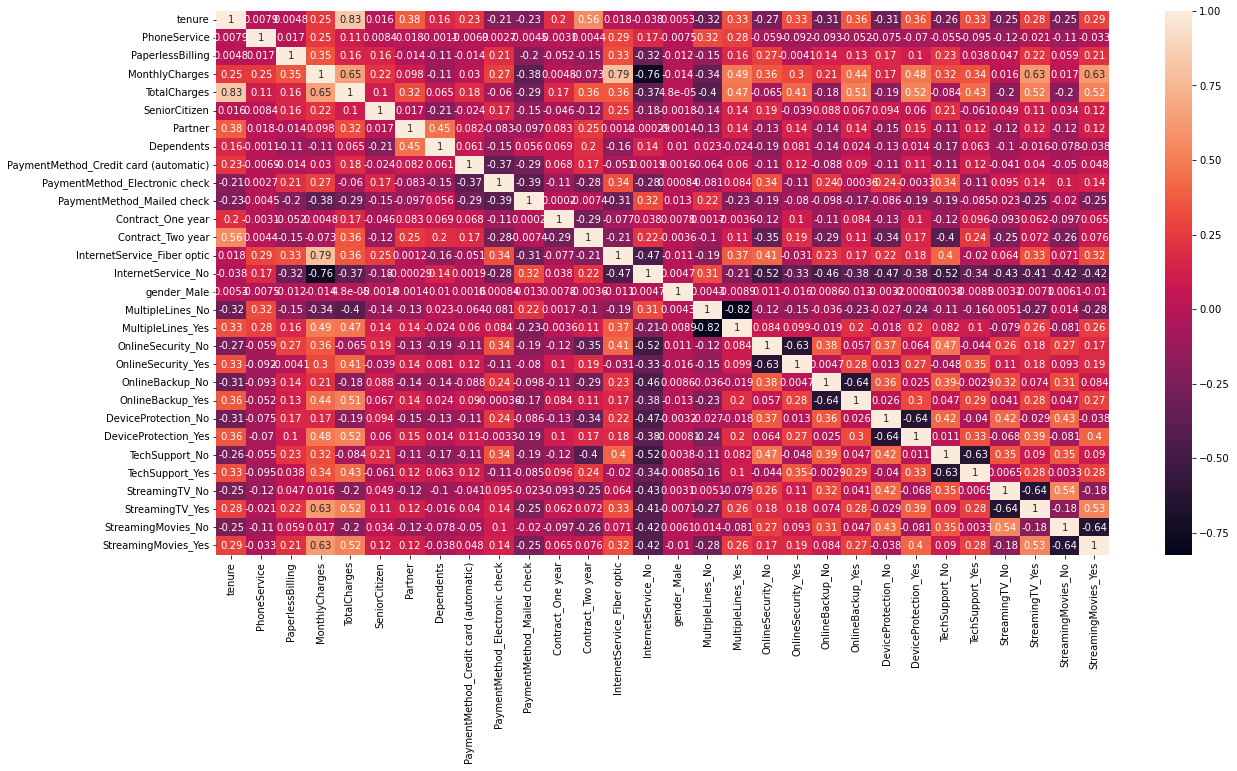

In [72]:
# Heatmap : To check the corelation b/w variables 
plt.figure(figsize = (20,10))
sns.heatmap(telecom.corr(),annot = True)
plt.show()

In [73]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Partner',
       'Dependents', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic',
       'InternetService_No', 'gender_Male', 'MultipleLines_No',
       'MultipleLines_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes'],
      dtype='object')

In [74]:
X_train= X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'], axis =1)
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],axis =1)
                                  
                                    

ValueError: No axis named 1 for object type Series

In [ ]:
X_train.head()

In [ ]:
X_test.head()

In [ ]:
Y_test

In [ ]:
Y_train

In [ ]:
Y_train = Y_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)
                                  

In [ ]:
Y_train.head()

In [ ]:
print(Y_train.shape)
print(X_train.shape)

In [ ]:
#X_train,Y_train,X_test,Y_test
print(X_test.shape)
print(Y_test.shape)


In [75]:
_X_test = Y_train

In [76]:
_Y_train = X_test


In [77]:

print(X_train.shape)
print(_X_test.shape)
print(_Y_train.shape)
print(Y_test.shape)

(4922, 23)
(2110, 30)
(4922,)
(2110,)


In [78]:
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,InternetService_Fiber optic,InternetService_No,gender_Male,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,1,...,0,0,0,0,0,1,0,0,1,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,1,...,1,0,0,0,0,1,1,0,0,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,1,...,1,0,1,0,1,1,1,1,1,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,...,1,0,0,0,0,0,1,1,1,1


In [79]:
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,InternetService_Fiber optic,InternetService_No,gender_Male,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,1,...,0,0,0,0,0,1,0,0,1,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,1,...,1,0,0,0,0,1,1,0,0,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,1,...,1,0,1,0,1,1,1,1,1,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,...,1,0,0,0,0,0,1,1,1,1


In [80]:
_X_test.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
942,24,1,1,79.85,2001.00,0,0,0,1,0,...,1,0,1,0,1,0,1,0,0,1
3730,57,1,1,104.50,5921.35,0,1,0,1,0,...,0,1,0,1,1,0,0,1,0,1
1761,58,1,1,24.45,1513.60,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2283,1,1,1,71.55,71.55,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1872,41,1,0,19.70,804.25,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
_Y_train.head()

879     0
5790    0
6498    1
880     1
2784    1
Name: Churn, dtype: int64

In [82]:
Y_test.head()

942     0
3730    1
1761    0
2283    1
1872    0
Name: Churn, dtype: int64

# Again check heatmap after dropping correlative variables

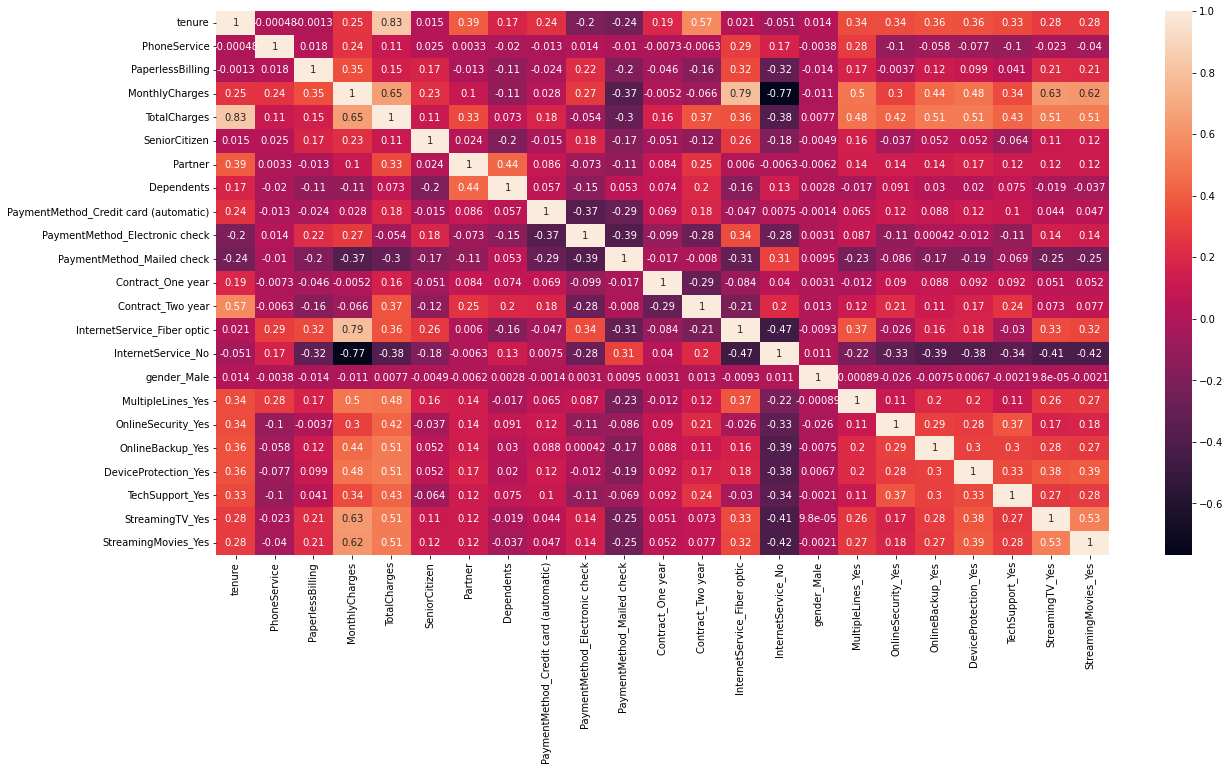

In [83]:
# Heatmap : To check the corelation b/w variables 
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

# Running your First Training Model


In [84]:
import statsmodels.api as sm

In [85]:
# Logestic regression Model
logm1 = sm.GLM(_Y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Wed, 18 May 2022   Deviance:                       4009.4
Time:                        19:59:21   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

# Build a Model using RFE and Automated approach¶

In [86]:
# Build a Logistic Regression model using SKLearn for RFE
from sklearn.linear_model import LogisticRegression
logreg_1 = LogisticRegression()


In [87]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg_1, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, _Y_train)

In [88]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', False, 3),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 7),
 ('Dependents', False, 6),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 4),
 ('PaymentMethod_Mailed check', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('gender_Male', False, 8),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 2),
 ('OnlineBackup_Yes', False, 5),
 ('DeviceProtection_Yes', False, 9),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [89]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'SeniorCitizen', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Mailed check', 'Contract_One year', 'Contract_Two year',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [90]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[~rfe.support_]

Index(['PhoneService', 'Partner', 'Dependents',
       'PaymentMethod_Electronic check', 'gender_Male', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes'],
      dtype='object')

In [91]:
col_1 = X_train.columns[rfe.support_]

# Assesing the model with Stats model

In [92]:
logm2 = sm.GLM(_Y_train,(sm.add_constant(X_train[col_1])),family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.1
Date:                Wed, 18 May 2022   Deviance:                       4022.2
Time:                        19:59:23   Pearson chi2:                 6.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2462      0.189    -11.879      0.000      -2.617      -1.876
tenure                                   -1.5596      0.187     -8.334      0.000      -1.926      -1.193
PaperlessBilling                          0.3436      0.090      3.832      0.000       0.168       0.519
MonthlyCharges                           -0.9692      0.199     -4.878      0.000      -1.359      -0.580
TotalCharges                              0.7421      0.197      3.764      0.000       0.356       1.128
SeniorCitizen                             0.4296      0.100      4.312      0.000       0.234       0.625
PaymentMethod_Credit card (automatic)    -0.3724      0.113     -3.308      0.001      -0.593      -0.152
PaymentMethod_Mailed check               -0.3723      0.111     -3.345      0.001      -0.591      -0.154
Contract_One year                        -0.6830      0.128     -5.342      0.000      -0.934      -0.432
Contract_Two year                        -1.2931      0.211     -6.138      0.000      -1.706      -0.880
InternetService_Fiber optic               1.5865      0.216      7.342      0.000       1.163       2.010
InternetService_No                       -1.6897      0.216     -7.830      0.000      -2.113      -1.267
MultipleLines_Yes                         0.3779      0.104      3.640      0.000       0.174       0.581
TechSupport_Yes                          -0.2408      0.109     -2.210      0.027      -0.454      -0.027
StreamingTV_Yes                           0.5796      0.114      5.102      0.000       0.357       0.802
StreamingMovies_Yes                       0.4665      0.111      4.197      0.000       0.249       0.684
=========================================================================================================
"""

In [93]:
# Getting the predicted value on  train set 
y_train_pred = res.predict(sm.add_constant(X_train[col_1]))
y_train_pred
                           

879     0.192642
5790    0.275624
6498    0.599507
880     0.513571
2784    0.648233
          ...   
79      0.015336
3934    0.126458
5964    0.039247
6947    0.129142
5649    0.031459
Length: 4922, dtype: float64

In [94]:
y_train_pred[:10]

879     0.192642
5790    0.275624
6498    0.599507
880     0.513571
2784    0.648233
3874    0.414846
5387    0.431184
6623    0.801788
4465    0.228194
5364    0.504575
dtype: float64

# Ctreating a data frame with the actual churn flag and the preeicted probabilties

In [95]:
_Y_train.head()

879     0
5790    0
6498    1
880     1
2784    1
Name: Churn, dtype: int64

In [96]:
y_train_pred_Final = pd.DataFrame({'Churn':_Y_train.values,'Churn_Prob':y_train_pred})
y_train_pred_Final

,Churn,Churn_Prob
879,0,0.192642
5790,0,0.275624
6498,1,0.599507
880,1,0.513571
2784,1,0.648233
...,...,...
79,0,0.015336
3934,0,0.126458
5964,0,0.039247
6947,0,0.129142


In [97]:
y_train_pred_Final['CustID']= _Y_train.index
y_train_pred_Final.head()

,Churn,Churn_Prob,CustID
879,0,0.192642,879
5790,0,0.275624,5790
6498,1,0.599507,6498
880,1,0.513571,880
2784,1,0.648233,2784


# Creating new colimn ' Predicted ' with 1 if churn prob > 0.5 else 0


In [98]:
y_train_pred_Final['Predicted']= y_train_pred_Final.Churn_Prob.map(lambda x: 1 if x>0.5 else 0)

In [99]:
y_train_pred_Final.head()

,Churn,Churn_Prob,CustID,Predicted
879,0,0.192642,879,0
5790,0,0.275624,5790,0
6498,1,0.599507,6498,1
880,1,0.513571,880,1
2784,1,0.648233,2784,1


In [100]:
from sklearn import metrics

In [101]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_Final.Churn, y_train_pred_Final.Predicted)

In [102]:
confusion

array([[3275,  360],
       [ 574,  713]], dtype=int64)

In [103]:
# Predicted   Not Churn  Churn
# Actual     
# Not Churn    3275        360
# Churn        574          713

In [104]:
# Lets Check Overall Accuracy 
# Calculate accuracy
print(metrics.accuracy_score(y_train_pred_Final.Churn, y_train_pred_Final.Predicted))

0.8102397399431126


In [105]:
# Calculate ViF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['Features'] = X_train[col_1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_1].values, i) for i in range(X_train[col_1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
2,MonthlyCharges,14.85
3,TotalCharges,10.42
0,tenure,7.38
9,InternetService_Fiber optic,5.61
10,InternetService_No,5.27
8,Contract_Two year,3.14
13,StreamingTV_Yes,2.79
14,StreamingMovies_Yes,2.79
1,PaperlessBilling,2.76
11,MultipleLines_Yes,2.38


In [106]:
X_train[col_1]

,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
879,0.019693,1,-0.338074,-0.276449,0,0,0,0,0,0,0,1,0,0,0
5790,0.305384,1,-0.464443,-0.112702,0,0,0,0,0,0,0,0,0,1,1
6498,-1.286319,1,0.581425,-0.974430,0,0,0,0,0,1,0,0,0,0,0
880,-0.919003,1,1.505913,-0.550676,0,0,0,0,0,1,0,0,1,1,1
2784,-1.163880,1,1.106854,-0.835971,0,0,0,0,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.509448,1,-1.294154,-0.474260,0,1,0,1,0,0,1,1,0,0,0
3934,-0.919003,0,-0.816946,-0.829291,0,0,1,1,0,0,0,0,1,0,0
5964,0.672699,0,-0.101964,0.322781,0,0,0,0,0,0,0,0,1,0,0
6947,1.448144,1,1.204956,1.974736,0,1,0,1,0,1,0,1,0,1,1


In [107]:
# Drop Monthly Charges
X_train = X_train[col_1].drop('MonthlyCharges',1)
X_train[col_1]

KeyError: "['MonthlyCharges'] not in index"

In [ ]:
col_1 = col_1.drop('MonthlyCharges',1)

In [ ]:
X_train[col_1]

# Build  a new Model after dropping  Monthly Charges Variable as it has highest VIF

In [108]:
logm3 = sm.GLM(_Y_train,(sm.add_constant(X_train[col_1])),family = sm.families.Binomial())
res = logm3.fit()
res.summary()

KeyError: "['MonthlyCharges'] not in index"

In [109]:
# Calculate ViF after Dropping Monthly Charges 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['Features'] = X_train[col_1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_1].values, i) for i in range(X_train[col_1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

KeyError: "['MonthlyCharges'] not in index"

 # Build a new Model Since MultipleLines_Yes has high P-  Value 

In [110]:
col_1

Index(['tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'SeniorCitizen', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Mailed check', 'Contract_One year', 'Contract_Two year',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [111]:
col_1 = col_1.drop('MultipleLines_Yes',1)

In [112]:
X_train[col_1].head()

KeyError: "['MonthlyCharges'] not in index"

In [113]:
logm4 = sm.GLM(_Y_train,(sm.add_constant(X_train[col_1])),family = sm.families.Binomial())
res = logm4.fit()
res.summary()

KeyError: "['MonthlyCharges'] not in index"

In [169]:
# Calculate ViF after Dropping MultipleLines_Yes 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['Features'] = X_train[col_1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_1].values, i) for i in range(X_train[col_1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

KeyError: "['MonthlyCharges'] not in index"

# Dropping StreamingMovies_Yes as it has got high p value.

In [115]:
col_1 = col_1.drop('StreamingMovies_Yes',1)

In [116]:
X_train[col_1].head()

KeyError: "['MonthlyCharges'] not in index"

In [117]:
logm5 = sm.GLM(_Y_train,(sm.add_constant(X_train[col_1])),family = sm.families.Binomial())
res = logm5.fit()
res.summary()

KeyError: "['MonthlyCharges'] not in index"

In [118]:
# Calculate ViF after Dropping StreamingMovies_Yes 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['Features'] = X_train[col_1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_1].values, i) for i in range(X_train[col_1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

KeyError: "['MonthlyCharges'] not in index"

#  Dropping Total charges since since it has got the highest VIF.

In [119]:
col_1 = col_1.drop('TotalCharges',1)

In [120]:
X_train[col_1].head()

KeyError: "['MonthlyCharges'] not in index"

In [121]:
logm6 = sm.GLM(_Y_train,(sm.add_constant(X_train[col_1])),family = sm.families.Binomial())
res = logm6.fit()
res.summary()

KeyError: "['MonthlyCharges'] not in index"

In [122]:
# Calculate ViF after Dropping StreamingMovies_Yes 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['Features'] = X_train[col_1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_1].values, i) for i in range(X_train[col_1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

KeyError: "['MonthlyCharges'] not in index"

In [123]:
# Getting the predicted value on  train set 
y_train_pred = res.predict(sm.add_constant(X_train[col_1]))
y_train_pred

KeyError: "['MonthlyCharges'] not in index"

In [124]:
y_train_pred_Final = pd.DataFrame({'Churn':_Y_train.values,'Churn_Prob':y_train_pred})
y_train_pred_Final

,Churn,Churn_Prob
879,0,0.192642
5790,0,0.275624
6498,1,0.599507
880,1,0.513571
2784,1,0.648233
...,...,...
79,0,0.015336
3934,0,0.126458
5964,0,0.039247
6947,0,0.129142


In [125]:
y_train_pred_Final['CustID']= _Y_train.index
y_train_pred_Final.head()

,Churn,Churn_Prob,CustID
879,0,0.192642,879
5790,0,0.275624,5790
6498,1,0.599507,6498
880,1,0.513571,880
2784,1,0.648233,2784


# Creating new colimn ' Predicted ' with 1 if churn prob > 0.5 else 0

In [126]:
y_train_pred_Final['Predicted']= y_train_pred_Final.Churn_Prob.map(lambda x: 1 if x>0.5 else 0)

In [127]:
y_train_pred_Final.head()

,Churn,Churn_Prob,CustID,Predicted
879,0,0.192642,879,0
5790,0,0.275624,5790,0
6498,1,0.599507,6498,1
880,1,0.513571,880,1
2784,1,0.648233,2784,1


In [128]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_Final.Churn, y_train_pred_Final.Predicted)

In [129]:
confusion

array([[3275,  360],
       [ 574,  713]], dtype=int64)

In [130]:
# Lets Check Overall Accuracy 
# Calculate accuracy
print(metrics.accuracy_score(y_train_pred_Final.Churn, y_train_pred_Final.Predicted))

0.8102397399431126


# Metrics beyone simply Accuracy

In [131]:

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [132]:
print(TP)
print(TN)
print(FP)
print(FN)

713
3275
360
574


In [133]:
# Sensitivity 
TP/float(TP+FN)


0.554001554001554

In [134]:
# Specificity
TN/float(TN+FP)

0.9009628610729024

In [135]:
# Calculate False Positive rate - pr3dicting churn when customer doesnot have churn
print(FP/float(TN+FP))

0.09903713892709766


In [136]:
# Positive Predictive Value
print(TP/float(TP+FP))

0.6644920782851818


In [137]:
# Negative Predictive Value
print(TN/float(TN+FN))


0.8508703559366069


# Plot ROC Curve

In [138]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

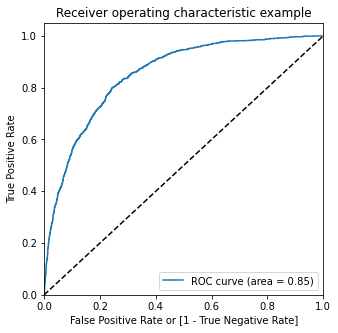

In [139]:
# Calling the function
draw_roc(y_train_pred_Final.Churn, y_train_pred_Final.Churn_Prob)

In [140]:
# lets Create column with different cutt offs.
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_Final[i]= y_train_pred_Final.Churn_Prob.map(lambda x: 1 if x>i else 0)

y_train_pred_Final.head()

,Churn,Churn_Prob,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
879,0,0.192642,879,0,1,1,0,0,0,0,0,0,0,0
5790,0,0.275624,5790,0,1,1,1,0,0,0,0,0,0,0
6498,1,0.599507,6498,1,1,1,1,1,1,1,0,0,0,0
880,1,0.513571,880,1,1,1,1,1,1,1,0,0,0,0
2784,1,0.648233,2784,1,1,1,1,1,1,1,1,0,0,0


# Calculate Accuracy, Sensitivity and Specificity.


In [141]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_Final.Churn, y_train_pred_Final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.261479  1.000000  0.000000
0.1   0.1  0.619057  0.946387  0.503164
0.2   0.2  0.716782  0.867133  0.663549
0.3   0.3  0.771231  0.777001  0.769188
0.4   0.4  0.792767  0.672106  0.835488
0.5   0.5  0.810240  0.554002  0.900963
0.6   0.6  0.804145  0.393162  0.949656
0.7   0.7  0.778342  0.195804  0.984594
0.8   0.8  0.747257  0.039627  0.997799
0.9   0.9  0.738521  0.000000  1.000000


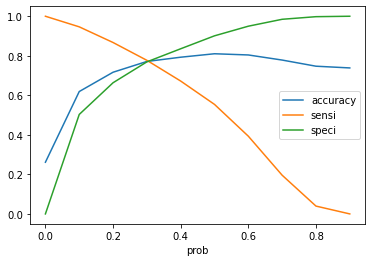

In [142]:
# plotting Accuracy , Sensitivity, Specifcity for different probabilities
cutoff_df.plot.line(x='prob',y= ['accuracy','sensi','speci'])
plt.show()

# Rerunning the model prediction after getting optimum threshould which is 0.3

In [143]:

# Creating new column 'predicted' with 1 if Churn_Prob > 0.3 else 0
y_train_pred_Final['predicted'] = y_train_pred_Final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [144]:
y_train_pred_Final.head()

,Churn,Churn_Prob,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
879,0,0.192642,879,0,1,1,0,0,0,0,0,0,0,0,0
5790,0,0.275624,5790,0,1,1,1,0,0,0,0,0,0,0,0
6498,1,0.599507,6498,1,1,1,1,1,1,1,0,0,0,0,1
880,1,0.513571,880,1,1,1,1,1,1,1,0,0,0,0,1
2784,1,0.648233,2784,1,1,1,1,1,1,1,1,0,0,0,1


In [145]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_Final.Churn, y_train_pred_Final.predicted)

In [146]:
confusion

array([[2796,  839],
       [ 287, 1000]], dtype=int64)

In [147]:
# Lets Check Overall Accuracy 
# Calculate accuracy
print(metrics.accuracy_score(y_train_pred_Final.Churn, y_train_pred_Final.predicted))

0.7712312068264933


In [148]:

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [149]:
TP

1000

In [150]:
TN

2796

In [151]:
FP

839

In [152]:
FN

287

In [153]:
# Sensitivity 
TP/float(TP+FN)


0.777000777000777

In [154]:
# Specificity
TN/float(TN+FP)

0.7691884456671252

In [155]:
# Precision 
TP/float(TP+FP)

0.5437737901033171

In [156]:
# Recall 
TP/float(TP+FN)

0.777000777000777

In [157]:
# we Can also get precision and Recal, score from precision_recall_curve from sklearn.metrics
from sklearn.metrics import precision_recall_curve

In [158]:
# we Can also get precision and Recal, score from precision_recall_curve from sklearn.metrics
from sklearn.metrics import precision_score,recall_score

In [159]:
precision_score(y_train_pred_Final.Churn,y_train_pred_Final.predicted)

0.5437737901033171

In [160]:
recall_score(y_train_pred_Final.Churn,y_train_pred_Final.predicted)

0.777000777000777

# Precision recall Tradeoff

In [161]:
from sklearn.metrics import precision_recall_curve

In [162]:
y_train_pred_Final.Churn,y_train_pred_Final.predicted

(879     0
 5790    0
 6498    1
 880     1
 2784    1
        ..
 79      0
 3934    0
 5964    0
 6947    0
 5649    0
 Name: Churn, Length: 4922, dtype: int64,
 879     0
 5790    0
 6498    1
 880     1
 2784    1
        ..
 79      0
 3934    0
 5964    0
 6947    0
 5649    0
 Name: predicted, Length: 4922, dtype: int64)

In [163]:
p, r, thresholds = precision_recall_curve(y_train_pred_Final.Churn, y_train_pred_Final.Churn_Prob)

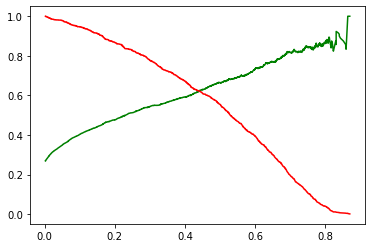

In [164]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Making predictions on the test set

In [167]:
_X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(_X_test[['tenure','MonthlyCharges','TotalCharges']])

In [174]:
col_1

Index(['tenure', 'PaperlessBilling', 'MonthlyCharges', 'SeniorCitizen',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic',
       'InternetService_No', 'TechSupport_Yes', 'StreamingTV_Yes'],
      dtype='object')

In [170]:
_X_test = _X_test[col_1]
_X_test.head()

,tenure,PaperlessBilling,MonthlyCharges,SeniorCitizen,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,TechSupport_Yes,StreamingTV_Yes
942,-0.347623,1,0.499951,0,1,0,0,0,1,0,0,0
3730,0.999203,1,1.319685,0,1,0,0,0,1,0,0,1
1761,1.040015,1,-1.342374,0,1,0,0,1,0,1,0,0
2283,-1.286319,1,0.223935,0,0,1,0,0,1,0,0,0
1872,0.346196,0,-1.500335,0,0,0,0,1,0,1,0,0


In [176]:
X_test_sm = sm.add_constant(_X_test)

In [178]:
X_test_sm

,const,tenure,PaperlessBilling,MonthlyCharges,SeniorCitizen,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,TechSupport_Yes,StreamingTV_Yes
942,1.0,-0.347623,1,0.499951,0,1,0,0,0,1,0,0,0
3730,1.0,0.999203,1,1.319685,0,1,0,0,0,1,0,0,1
1761,1.0,1.040015,1,-1.342374,0,1,0,0,1,0,1,0,0
2283,1.0,-1.286319,1,0.223935,0,0,1,0,0,1,0,0,0
1872,1.0,0.346196,0,-1.500335,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1.0,1.244080,0,0.132483,0,0,0,1,0,0,0,1,0
3508,1.0,1.529770,1,1.623968,0,0,0,0,1,1,0,1,1
6765,1.0,1.488957,1,-1.304131,0,0,0,0,1,0,1,0,0
3598,1.0,-1.286319,0,-0.615753,1,0,0,0,0,0,0,0,0


In [177]:
# Making Prediction on test data set 
y_test_pred = res.predict(X_test_sm)


ValueError: shapes (2110,13) and (16,) not aligned: 13 (dim 1) != 16 (dim 0)

In [179]:
X_train.shape

(4922, 14)

In [184]:
_X_test.shape

(2110, 12)

In [185]:
X.shape


(7032, 30)

In [186]:
y.shape

(7032,)

# USing Decision tree

In [187]:
X_train,X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [188]:
X_train.shape

(4922, 30)

In [190]:
X_test.shape

(2110, 30)

In [192]:
from sklearn.tree import DecisionTreeClassifier

In [193]:
# Instantiate 
DT_Base = DecisionTreeClassifier(random_state = 42, max_depth =4)

In [194]:
# ffit
DT_Base.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [195]:
y_train_pred = DT_Base.predict(X_train)
y_test_pred = DT_Base.predict(X_test)


In [197]:
from sklearn.metrics import classification_report

In [198]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1528
           1       0.67      0.45      0.54       582

    accuracy                           0.79      2110
   macro avg       0.74      0.68      0.70      2110
weighted avg       0.78      0.79      0.77      2110



# plot ROC

In [201]:
from sklearn.metrics import plot_roc_curve

In [202]:
plot_roc_curve(DT_Base,X_train,Y_train,drop_intermediate =False)
plt.show()

ValueError: continuous-multioutput format is not supported

In [ ]:
# Getting the predicted value on  unseen data 
y_unseen_pred = logm_PCA.predict(sm.add_constant(df_test_unseen_pca))
y_unseen_pred

In [ ]:
High_val_cust_unseen['Pred_churn_probability']= y_unseen_pred

In [ ]:
output = High_val_cust_unseen[['id','Pred_churn_probability']]
output.head()

In [ ]:
# now lets convert probability prediction into class 0 and 1 
# and add final column 'churn_probability' as per threshould obtain which is 0.5

output['churn_probability'] = output.Pred_churn_probability.map(lambda x: 1 if x>0.5 else 0)
output.head()

In [ ]:
# dropping 'Pred_churn_probability' as not required in submission file
submision = output.drop('Pred_churn_probability', axis=1)
submision.head()

In [ ]:
# converting to csv file
submision.to_csv(r'C:\Users\pc\OneDrive\Desktop\Kaggle_project\submission_pca_lr_14jul.csv',index=False)

In [ ]:
High_val_cust_unseen_W_id